In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.datasets import fashion_mnist
import Mnist_cnn
import Mnist_mlp
import Mnist_cnn_lr
import Mnist_mlp_lr
import Mnist_cnn_custom
import Mnist_mlp_custom
import Cifar10_cnn
import Cifar10_mlp
import Cifar10_cnn_custom
import Cifar10_mlp_custom
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

---

### Data Visualization

In [2]:
def Data_inform(data):
    print("Sample size: ",data.size)     
    print("Sample Shape: ",data.shape)  
    print("Classes num: ",len(np.unique(data)), '\n')

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('minist x_train')
Data_inform(x_train)
print('minist y_train')
Data_inform(y_train)
print('minist x_test')
Data_inform(x_test)
print('minist y_test')
Data_inform(y_test)


minist x_train
Sample size： 47040000
Sample Shape： (60000, 28, 28)
Classes num： 256 

minist y_train
Sample size： 60000
Sample Shape： (60000,)
Classes num： 10 

minist x_test
Sample size： 7840000
Sample Shape： (10000, 28, 28)
Classes num： 256 

minist y_test
Sample size： 10000
Sample Shape： (10000,)
Classes num： 10 



---

### Minist CNN

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

batch_size = 128
num_classes = 10
epochs = 20

# RandomUniform
# tanh
# SGD
# l2
# True

lr = [0.001, 0.003, 0.0003]


# mlp_setups = ['glorot_normal', 'relu', 'rmsprop', 'l2']

CNN_results = []

# mnist cnn
print('Minist CNN')
for i in range(3):
    print('=====================', i ,'=====================')
    print(lr[i])
    CNN_results.append(Mnist_cnn_lr.network( x_train, y_train, 
                        x_test, y_test,
                        batch_size, 
                        num_classes, 
                        epochs,
                        initializer = 'RandomUniform',
                        regularizer = 'l2',
                        activation = 'tanh',
                        dropout = 'True',
                        lr = lr[i],
                        plot_num = i))

Minist CNN
===================== 0 =====================
0.001
Train loss: 2.7610158920288086
Train accuracy: 0.8108333349227905
Test loss: 2.785310983657837
Test accuracy: 0.7997999787330627
===================== 1 =====================
0.003
Train loss: 1.610916018486023
Train accuracy: 0.8327333331108093
Test loss: 1.6369231939315796
Test accuracy: 0.8195000290870667
===================== 2 =====================
0.0003
Train loss: 3.507309675216675
Train accuracy: 0.7656833529472351
Test loss: 3.526484489440918
Test accuracy: 0.7554000020027161


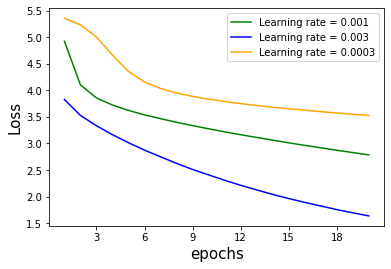

In [82]:
C_l1 = CNN_results[0]
C_l3 = CNN_results[1]
C_l03 = CNN_results[2]

C_loss_1 = C_l1
C_loss_3 = C_l3
C_loss_03 = C_l03
ax1 = plt.subplot()
epochs = range(1, 21)
# plt.title('Test loss of Mnist CNN')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('Loss', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
L1, = ax1.plot(epochs, C_loss_1, 'green', label='Learning rate = 0.001')
L2, = ax1.plot(epochs, C_loss_3, 'blue', label='Learning rate = 0.003')
L3, = ax1.plot(epochs, C_loss_03, 'orange', label='Learning rate = 0.0003')
plt.legend(handles = [L1, L2, L3], loc = 'upper right', fontsize=10)
# plt.savefig('../fig/'+'Basic_minist_cnn'+'.jpg')
plt.show()

In [18]:
print('Minist MLP')
MLP_results = []

batch_size = 128
num_classes = 10
epochs = 20

for i in range(3):
    print('=====================', i ,'=====================')
    print(lr[i])
    MLP_results.append(Mnist_mlp_lr.network( x_train, y_train, 
                        x_test, y_test,
                        batch_size, 
                        num_classes, 
                        epochs,
                        initializer = 'RandomUniform',
                        regularizer = 'l2',
                        activation = 'tanh',
                        dropout = 'True',
                        lr = lr[i],
                        plot_num = i))

Minist MLP
===================== 0 =====================
0.001
Train loss: 6.674551963806152
Train accuracy: 0.8067833185195923
Test loss: 6.695767879486084
Test accuracy: 0.7939000129699707
===================== 1 =====================
0.003
Train loss: 3.5853891372680664
Train accuracy: 0.8253666758537292
Test loss: 3.6088883876800537
Test accuracy: 0.8148000240325928
===================== 2 =====================
0.0003
Train loss: 8.537801742553711
Train accuracy: 0.7590333223342896
Test loss: 8.553959846496582
Test accuracy: 0.7450000047683716


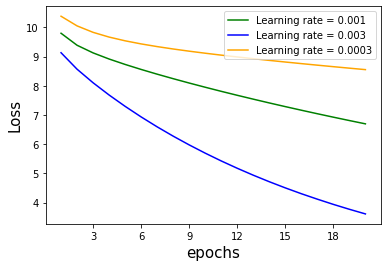

In [81]:
M_l1 = MLP_results[0]
M_l3 = MLP_results[1]
M_l03 = MLP_results[2]

M_loss_1 = M_l1
M_loss_3 = M_l3
M_loss_03 = M_l03
ax1 = plt.subplot()
epochs = range(1, 21)
# plt.title('Test loss of Mnist MLP')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('Loss', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
L1, = ax1.plot(epochs, M_loss_1, 'green', label='Learning rate = 0.001')
L2, = ax1.plot(epochs, M_loss_3, 'blue', label='Learning rate = 0.003')
L3, = ax1.plot(epochs, M_loss_03, 'orange', label='Learning rate = 0.0003')
plt.legend(handles = [L1, L2, L3], loc = 'upper right', fontsize=10)
# plt.savefig('../fig/'+'Basic_minist_cnn'+'.jpg')
plt.show()

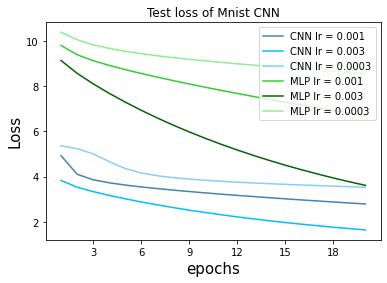

In [72]:
plt.figure(figsize=(6, 4))
ax1 = plt.subplot()

epochs = range(1, 21)
plt.title('Test loss of Mnist CNN')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('Loss', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
L1, = ax1.plot(epochs, C_loss_1, color = "steelblue", label='CNN lr = 0.001')
L2, = ax1.plot(epochs, C_loss_3, color = "deepskyblue",label='CNN lr = 0.003')
L3, = ax1.plot(epochs, C_loss_03, color = "lightskyblue",label='CNN lr = 0.0003')
L4, = ax1.plot(epochs, M_loss_1, color = "limegreen",label='MLP lr = 0.001')
L5, = ax1.plot(epochs, M_loss_3, color = "darkgreen",label='MLP lr = 0.003')
L6, = ax1.plot(epochs, M_loss_03, color = "lightgreen",label='MLP lr = 0.0003')
plt.legend(handles = [L1, L2, L3, L4, L5, L6], loc = 'upper right', fontsize=10)
# plt.savefig('../fig/'+'Basic_minist_cnn'+'.jpg')
plt.show()

In [73]:
print('Minist custom CNN')
cus_CNN_results = []
batch_size = 128
num_classes = 10
epochs = 20
for i in range(3):
    print('=====================', i ,'=====================')
    print(lr[i])
    cus_CNN_results.append(Mnist_cnn_custom.custom_network( x_train, y_train, 
                        x_test, y_test,
                        batch_size, 
                        num_classes, 
                        epochs,
                        initializer = 'RandomUniform',
                        regularizer = 'l2',
                        activation = 'tanh',
                        dropout = 'True',
                        lr = lr[i],
                        plot_num = i))

Minist custom CNN
===================== 0 =====================
0.001
Train loss: 3.337867021560669
Train accuracy: 0.8043666481971741
Test loss: 3.3625311851501465
Test accuracy: 0.7940000295639038
===================== 1 =====================
0.003
Train loss: 1.8739556074142456
Train accuracy: 0.8402666449546814
Test loss: 1.8995074033737183
Test accuracy: 0.828499972820282
===================== 2 =====================
0.0003
Train loss: 4.248619556427002
Train accuracy: 0.7697333097457886
Test loss: 4.269271373748779
Test accuracy: 0.7610999941825867


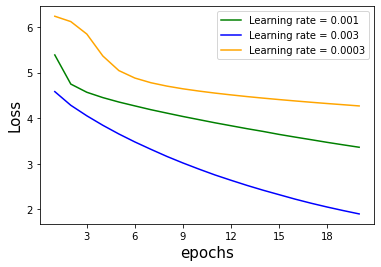

In [80]:
cus_C_l1 = cus_CNN_results[0]
cus_C_l3 = cus_CNN_results[1]
cus_C_l03 = cus_CNN_results[2]

cus_C_loss_1 = cus_C_l1
cus_C_loss_3 = cus_C_l3
cus_C_loss_03 = cus_C_l03
ax1 = plt.subplot()
epochs = range(1, 21)
# plt.title('Test loss of Mnist CNN')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('Loss', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
L1, = ax1.plot(epochs, cus_C_loss_1, 'green', label='Learning rate = 0.001')
L2, = ax1.plot(epochs, cus_C_loss_3, 'blue', label='Learning rate = 0.003')
L3, = ax1.plot(epochs, cus_C_loss_03, 'orange', label='Learning rate = 0.0003')
plt.legend(handles = [L1, L2, L3], loc = 'upper right', fontsize=10)
# plt.savefig('../fig/'+'Basic_minist_cnn'+'.jpg')
plt.show()

In [74]:
print('Minist custom MLP')
cus_MLP_results = []
batch_size = 128
num_classes = 10
epochs = 20
for i in range(3):
    print('=====================', i ,'=====================')
    print(lr[i])
    cus_MLP_results.append(Mnist_mlp_custom.custom_network( x_train, y_train, 
                        x_test, y_test,
                        batch_size, 
                        num_classes, 
                        epochs,
                        initializer = 'RandomUniform',
                        regularizer = 'l2',
                        activation = 'tanh',
                        dropout = 'True',
                        lr = lr[i],
                        plot_num = i))

Minist custom MLP
===================== 0 =====================
0.001
Train loss: 10.183931350708008
Train accuracy: 0.8112833499908447
Test loss: 10.208828926086426
Test accuracy: 0.7953000068664551
===================== 1 =====================
0.003
Train loss: 5.258855819702148
Train accuracy: 0.8264333605766296
Test loss: 5.283851146697998
Test accuracy: 0.8126000165939331
===================== 2 =====================
0.0003
Train loss: 13.101232528686523
Train accuracy: 0.760016679763794
Test loss: 13.120829582214355
Test accuracy: 0.7447999715805054


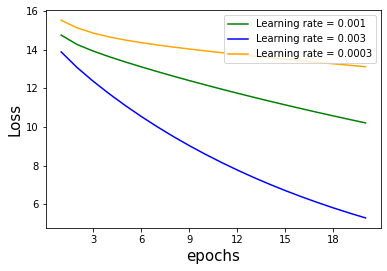

In [79]:
cus_M_l1 = cus_MLP_results[0]
cus_M_l3 = cus_MLP_results[1]
cus_M_l03 = cus_MLP_results[2]

cus_M_loss_1 = cus_M_l1
cus_M_loss_3 = cus_M_l3
cus_M_loss_03 = cus_M_l03
ax1 = plt.subplot()
epochs = range(1, 21)
# plt.title('Test loss of Mnist MLP')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('Loss', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
L1, = ax1.plot(epochs, cus_M_loss_1, 'green', label='Learning rate = 0.001')
L2, = ax1.plot(epochs, cus_M_loss_3, 'blue', label='Learning rate = 0.003')
L3, = ax1.plot(epochs, cus_M_loss_03, 'orange', label='Learning rate = 0.0003')
plt.legend(handles = [L1, L2, L3], loc = 'upper right', fontsize=10)
# plt.savefig('../fig/'+'Basic_minist_cnn'+'.jpg')
plt.show()

---

### best  
To training cifar10, we have to change the input channels from 1 to 3 (RGB)

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

batch_size = 128
num_classes = 10
epochs = 20
lr = [0.001, 0.003]
Cif10_CNN_results = []
for i in range(len(lr)):
    print('=====================', i ,'=====================')
    print(lr[i])
    Cif10_CNN_results.append(Cifar10_cnn.network( x_train, y_train, 
                            x_test, y_test,
                            batch_size, 
                            num_classes, 
                            epochs,
                            initializer = 'RandomUniform',
                            regularizer = 'l2',
                            activation = 'tanh',
                            dropout = 'True',
                            lr = lr[i],
                            plot_num = '1'))

===================== 0 =====================
0.001
Train loss: 4.1097564697265625
Train accuracy: 0.39434000849723816
Test loss: 4.1058526039123535
Test accuracy: 0.39800000190734863
===================== 1 =====================
0.003
Train loss: 2.9102675914764404
Train accuracy: 0.45410001277923584
Test loss: 2.915452003479004
Test accuracy: 0.4458000063896179


In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

batch_size = 128
num_classes = 10
epochs = 20
lr = [0.003]
cus_Cif10_CNN_results = []
for i in range(len(lr)):
    print('=====================', i ,'=====================')
    print(lr[i])
    cus_Cif10_CNN_results.append(Cifar10_cnn_custom.network( x_train, y_train, 
                            x_test, y_test,
                            batch_size, 
                            num_classes, 
                            epochs,
                            initializer = 'RandomUniform',
                            regularizer = 'l2',
                            activation = 'tanh',
                            dropout = 'True',
                            lr = lr[i],
                            plot_num = '1'))

===================== 0 =====================
0.003
Train loss: 3.1783974170684814
Train accuracy: 0.4779999852180481
Test loss: 3.191633701324463
Test accuracy: 0.4699999988079071


In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

batch_size = 128
num_classes = 10
epochs = 20
lr = [0.001, 0.003]
Cif10_MLP_results = []
for i in range(len(lr)):
    print('=====================', i ,'=====================')
    print(lr[i])
    Cif10_MLP_results.append(Cifar10_mlp.network( x_train, y_train, 
                            x_test, y_test,
                            batch_size, 
                            num_classes, 
                            epochs,
                            initializer = 'RandomUniform',
                            regularizer = 'l2',
                            activation = 'tanh',
                            dropout = 'True',
                            lr = lr[i],
                            plot_num = '1'))

===================== 0 =====================
0.001
Train loss: 15.276667594909668
Train accuracy: 0.38576000928878784
Test loss: 15.28050422668457
Test accuracy: 0.384799987077713
===================== 1 =====================
0.003
Train loss: 9.026655197143555
Train accuracy: 0.3953999876976013
Test loss: 9.031554222106934
Test accuracy: 0.39259999990463257


In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

batch_size = 128
num_classes = 10
epochs = 20
lr = [0.003]
cus_Cif10_MLP_results = []
for i in range(len(lr)):
    print('=====================', i ,'=====================')
    print(lr[i])
    cus_Cif10_MLP_results.append(Cifar10_mlp_custom.network( x_train, y_train, 
                            x_test, y_test,
                            batch_size, 
                            num_classes, 
                            epochs,
                            initializer = 'RandomUniform',
                            regularizer = 'l2',
                            activation = 'tanh',
                            dropout = 'True',
                            lr = lr[i],
                            plot_num = '1'))

===================== 0 =====================
0.003
Train loss: 11.047967910766602
Train accuracy: 0.3941600024700165
Test loss: 11.053780555725098
Test accuracy: 0.3894999921321869


In [12]:
CNN01 = Cif10_CNN_results[0]
CNN03 = Cif10_CNN_results[1]
cus_CNN03 = cus_Cif10_CNN_results[0]

MLP01 = Cif10_MLP_results[0]
MLP03 = Cif10_MLP_results[1]
cus_MLP03 = cus_Cif10_MLP_results[0]

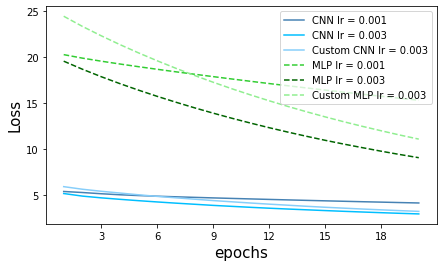

In [23]:
plt.figure(figsize=(7, 4))
ax1 = plt.subplot()

epochs = range(1, 21)
# plt.title('Test loss of Mnist CNN')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('Loss', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
L1, = ax1.plot(epochs, CNN01, color = "steelblue",  label='CNN lr = 0.001')
L2, = ax1.plot(epochs, CNN03, color = "deepskyblue",label='CNN lr = 0.003')
L3, = ax1.plot(epochs, cus_CNN03, color = "lightskyblue",label='Custom CNN lr = 0.003')
L4, = ax1.plot(epochs, MLP01, color = "limegreen",linestyle='--',label='MLP lr = 0.001')
L5, = ax1.plot(epochs, MLP03, color = "darkgreen",linestyle='--',label='MLP lr = 0.003')
L6, = ax1.plot(epochs, cus_MLP03, color = "lightgreen",linestyle='--',label='Custom MLP lr = 0.003')
plt.legend(handles = [L1, L2, L3, L4, L5, L6], loc = 'upper right', fontsize=10)
# plt.savefig('../fig/'+'Basic_minist_cnn'+'.jpg')
plt.show()

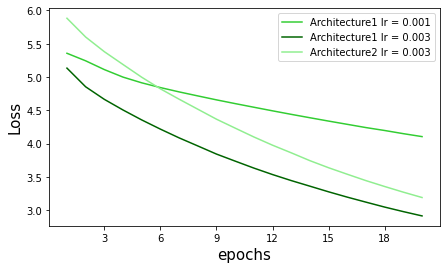

In [29]:
# CNN

plt.figure(figsize=(7, 4))
ax1 = plt.subplot()

epochs = range(1, 21)
# plt.title('Test loss of Mnist CNN')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('Loss', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
L1, = ax1.plot(epochs, CNN01, color = "limegreen",  label='Architecture1 lr = 0.001')
L2, = ax1.plot(epochs, CNN03, color = "darkgreen",label='Architecture1 lr = 0.003')
L3, = ax1.plot(epochs, cus_CNN03, color = "lightgreen",label='Architecture2 lr = 0.003')
plt.legend(handles = [L1, L2, L3], loc = 'upper right', fontsize=10)
# plt.savefig('../fig/'+'Basic_minist_cnn'+'.jpg')
plt.show()

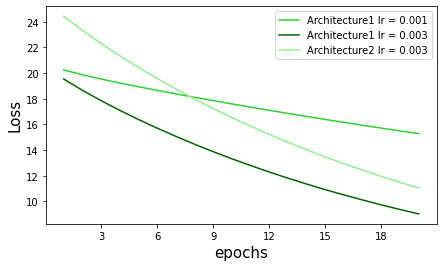

In [28]:
# MLP

plt.figure(figsize=(7, 4))
ax1 = plt.subplot()

epochs = range(1, 21)
# plt.title('Test loss of Mnist CNN')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('Loss', fontsize=15)
ax1.set_xlabel('epochs', fontsize=15)
L1, = ax1.plot(epochs, MLP01, color = "limegreen",  label='Architecture1 lr = 0.001')
L2, = ax1.plot(epochs, MLP03, color = "darkgreen",label='Architecture1 lr = 0.003')
L3, = ax1.plot(epochs, cus_MLP03, color = "lightgreen",label='Architecture2 lr = 0.003')
plt.legend(handles = [L1, L2, L3], loc = 'upper right', fontsize=10)
# plt.savefig('../fig/'+'Basic_minist_cnn'+'.jpg')
plt.show()